In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import json, os, joblib, math, ast
from itertools import product

# COMPARAÇÃO DE MODELOS

In [38]:
df = []

for path in os.listdir('Backup'):
    index = int(path.split('_')[-1])
    
    with open(f'Backup/{path}/info.json', 'r', encoding='utf-8') as file:
        data = json.loads(file.read())
    
    name = data['model']
    data = data['info']
    data['name'] = name
    data['id'] = index
    df.append(data)


df = pd.DataFrame(df)
df

,accuracy,precision,recall,auc,name,id
0,0.76447,0.767179,0.76447,0.963776,svm,1


In [39]:
df = df.sort_values(by='auc', ascending=False)
df

,accuracy,precision,recall,auc,name,id
0,0.76447,0.767179,0.76447,0.963776,svm,1


Text(0, 0.5, 'AUC')

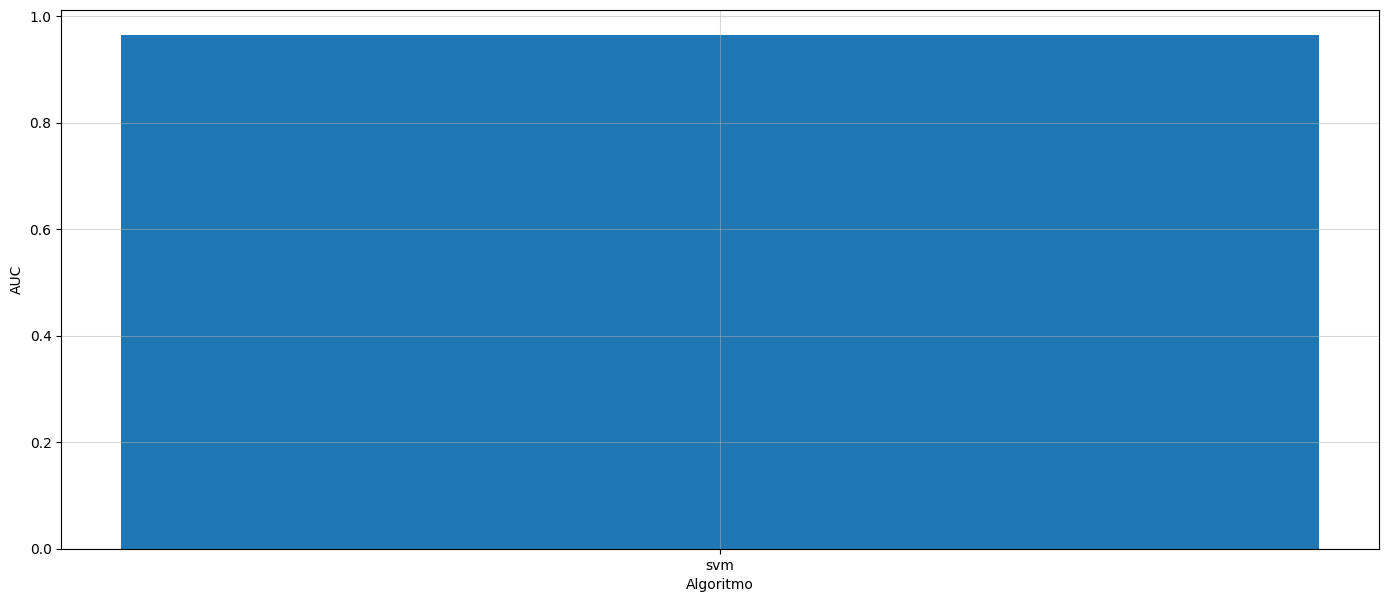

In [40]:
plt.figure(figsize=(17, 7))
plt.bar(df.name, df.auc)
plt.grid(alpha=0.5)
plt.xlabel('Algoritmo'); plt.ylabel('AUC')

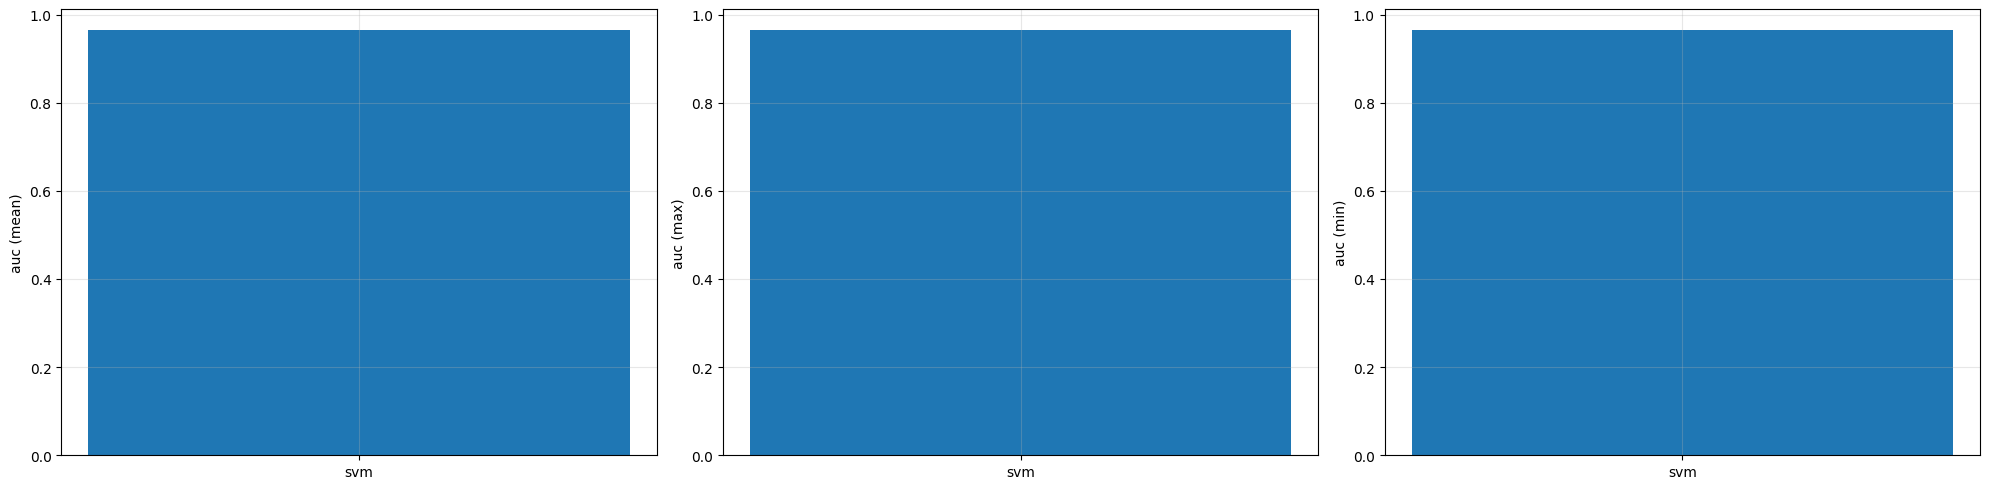

In [41]:
def plotSummary(metric):
    data = {}

    for name in df.name.unique():
        auc = df.loc[df.name == name].auc.agg(metric)
        data[name] = auc
    
    plt.bar(data.keys(), data.values())
    plt.ylabel(f'auc ({metric})')
    plt.grid(alpha=0.3)
    plt.tight_layout()


plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plotSummary('mean')

plt.subplot(1, 3, 2)
plotSummary('max')

plt.subplot(1, 3, 3)
plotSummary('min')

# SELECIONANDO MODELO

In [42]:
target = df.loc[df.name == 'svm'].sort_values(by='auc',ascending=False)
target

,accuracy,precision,recall,auc,name,id
0,0.76447,0.767179,0.76447,0.963776,svm,1


In [43]:
def loadModel(id):
    with open(f'Backup/model_{id}/info.json', 'r', encoding='utf-8') as file:
        data = json.loads(file.read())

    data['model'] = joblib.load(f'Backup/model_{id}/model.pkl')
    return data


id   = target.iloc[0].id
data = loadModel(id)
data

{'model': Pipeline(steps=[('scaler', StandardScaler()),
                 ('model', SVC(probability=True, random_state=42))]),
 'params': {'memory': 'None',
  'steps': "[('scaler', StandardScaler()), ('model', SVC(probability=True, random_state=42))]",
  'transform_input': 'None',
  'verbose': 'False',
  'scaler': 'StandardScaler()',
  'model': 'SVC(probability=True, random_state=42)',
  'scaler__copy': 'True',
  'scaler__with_mean': 'True',
  'scaler__with_std': 'True',
  'model__C': '1.0',
  'model__break_ties': 'False',
  'model__cache_size': '200',
  'model__class_weight': 'None',
  'model__coef0': '0.0',
  'model__decision_function_shape': 'ovr',
  'model__degree': '3',
  'model__gamma': 'scale',
  'model__kernel': 'rbf',
  'model__max_iter': '-1',
  'model__probability': 'True',
  'model__random_state': '42',
  'model__shrinking': 'True',
  'model__tol': '0.001',
  'model__verbose': 'False'},
 'K_CV': 5,
 'variables': ['NM_M',
  'PE',
  'Formation_B5 LM',
  'ILD_log10',
  'PHIND',

In [44]:
variables = data['variables']
model = data['model']
model

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'


# CARREGANDO DADOS

In [45]:
df = pd.read_csv('../Dataset/model.csv')
df.head(3)

,NM_M,PE,Formation_B5 LM,ILD_log10,PHIND,GR,Depth,Formation_A1 SH,Formation_B4 SH,Formation_B1 SH,...,Formation_B2 LM,Formation_C LM,Formation_B3 SH,DeltaPHI,Formation_B1 LM,Formation_C SH,Well Name_CROSS H CATTLE,Formation_B2 SH,Formation_B3 LM,Facies
0,1,4.6,False,0.664,11.915,77.45,2793.0,True,False,False,...,False,False,False,9.9,False,False,False,False,False,3
1,1,4.1,False,0.661,12.565,78.26,2793.5,True,False,False,...,False,False,False,14.2,False,False,False,False,False,3
2,1,3.6,False,0.658,13.050,79.05,2794.0,True,False,False,...,False,False,False,14.8,False,False,False,False,False,3


In [46]:
data['thresholds']

[{'class': 1, 'treshold': 0.1066052268},
 {'class': 2, 'treshold': 0.2083183341},
 {'class': 3, 'treshold': 0.2038267062},
 {'class': 4, 'treshold': 0.0595513392},
 {'class': 5, 'treshold': 0.0943536968},
 {'class': 6, 'treshold': 0.1592953409},
 {'class': 7, 'treshold': 0.0488286038},
 {'class': 8, 'treshold': 0.150510965},
 {'class': 9, 'treshold': 0.1121427725}]